In [425]:
from googleapiclient.discovery import build
with open('api.txt', 'r') as file:
    # Read the contents of the file
    key = file.read()
# Replace YOUR_API_KEY with the API key you obtained
API_KEY = key
youtube = build('youtube', 'v3', developerKey=API_KEY)

In [426]:
channel_id=input("enter the channel id")
# UCQHX6ViZmPsWiYSFAyS0a3Q   :- gotham chess
# UCHRGA07fn3RpmPvUD-qgE-A   :- slow tv

In [427]:
videos_response = youtube.search().list(
    part='snippet',
    channelId=channel_id,
    type='video',
    maxResults=9,
    order='viewCount'
).execute()

In [428]:
video_links = []
for item in videos_response['items']:
    video_id = item['id']['videoId']
    video_link = f'https://www.youtube.com/watch?v={video_id}'
    video_links.append(video_link)

In [429]:
video_links

['https://www.youtube.com/watch?v=1SrqYHgPOx4',
 'https://www.youtube.com/watch?v=QQ69f80QxHA',
 'https://www.youtube.com/watch?v=Jmwk4ufcdyE',
 'https://www.youtube.com/watch?v=B1Jdc2UMkNQ',
 'https://www.youtube.com/watch?v=i7tcBQjKOzs',
 'https://www.youtube.com/watch?v=Hcol58dzNL8',
 'https://www.youtube.com/watch?v=-ZVbDR3sRRo',
 'https://www.youtube.com/watch?v=TIHxmtdX3FM',
 'https://www.youtube.com/watch?v=F3KsdeUDSrA']

In [430]:
def get_video_details(video_link):
    # Extract video ID from the video link
    video_id = video_link.split('=')[-1]

    # Retrieve video details
    video_response = youtube.videos().list(
        part='snippet',
        id=video_id
    ).execute()

    # Retrieve video comments
    comments_response = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText',
        maxResults=500 # Adjust this value to retrieve more or fewer comments
    ).execute()

    # Extract video title
    video_title = video_response['items'][0]['snippet']['title']

    # Extract comments
    comments = []
    for item in comments_response['items']:
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        comments.append(comment)

    return video_title, comments


In [431]:
import re
def clean_filename(filename):
    # Remove special characters using regular expressions
    cleaned_filename = re.sub(r'[^\w\-_. ]', '', filename)
    # Replace spaces with underscores
    cleaned_filename = cleaned_filename.replace(' ', '_')
    return cleaned_filename

In [432]:
titles=[]
comments_list=[]
for link in video_links:
    title, comments = get_video_details(link)
    titles.append(clean_filename(title))
    comments_list.append(comments)
    
    

In [433]:
titles

['Why_did_Magnus_do_this',
 'IMPORTANT_Chess_Tip',
 '30_Queens._Can_Martin_Win',
 'Chess_Is_SOLVED',
 'Magnus_Carlsen_ILLEGAL_MOVE',
 'NEW_WORLD_CHAMPION',
 'The_Advanced_Chess_Bots_Are_Terrifying',
 'GENIUS_Chess_Trick',
 'Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone']

In [434]:
comments_list[2]

['He is a noob',
 'I know im pretty late, and i randomly found this video, but to me it looks like martin isnt programmed to play aggressive chess UNLESS the "material points" are nearly equal.  every now and than the bot hits the aggression rng roll but 90% of the time is comfortable with shuffling or consolidating providing it has a material lead.',
 'martin sucks at chess, but damn he can pull.',
 'I can just imagine Levy going all out against a 3 year old',
 'Your elo is over 10x that of Martin.',
 'At 17:15 Gotham missed mate by going queen to a3',
 'I’m impressed that he can lose with 30 queens!?',
 'me: mom i took 81 points of material\nmom: you are still down 102 points!!',
 "That guys trolling it's easy win use queen eat all lol even I'm not good at chess I can defeat easy",
 'martins letting you win',
 'Magnus: I once beat Martin with nothing but my king and he had 62 queens.',
 'Bro u goat',
 'The 5 knights checkmate was absolute humiliation',
 "he could've just sacrificed o

In [435]:
import os
import shutil
try:
    shutil.rmtree('comments')
    os.mkdir('comments')
except:
    os.mkdir('comments')


In [436]:
import pickle
for i in range(9):
    with open("comments/" + titles[i] + ".txt", "wb") as file:
        pickle.dump(comments_list[i], file)

In [437]:
data = {}
for i, c in enumerate(titles):
    with open("comments/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [438]:
data.keys()

dict_keys(['Why_did_Magnus_do_this', 'IMPORTANT_Chess_Tip', '30_Queens._Can_Martin_Win', 'Chess_Is_SOLVED', 'Magnus_Carlsen_ILLEGAL_MOVE', 'NEW_WORLD_CHAMPION', 'The_Advanced_Chess_Bots_Are_Terrifying', 'GENIUS_Chess_Trick', 'Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone'])

In [439]:
data[titles[1]][ :5]

['Thank you i will never use this',
 'my bad. me and my brother keeps calling the king "queen" because the queens piece has a crown resembling a king. 😂 (thanks for the tip)',
 'Can you do more 30 second chess lessons',
 'Shit',
 'Hey man, just letting you know, having "sadistic" in your username is going to move you down in the algorithm and youtube wont recommend your videos as often because it is a sensitive word.']

In [440]:
next(iter(data.keys()))

'Why_did_Magnus_do_this'

In [441]:
next(iter(data.values()))

['The full video of the game: https://youtu.be/wofz0k6FCMU',
 'Sor for the uninitiated...how is the move an offer for a draw?',
 "I don't understand how he offered this draw after 5 moves and how buddy knew it was supposed to be a draw",
 'The chilis gambit',
 'Of course he went to India and had a shit hemorrhage.',
 "Either accept the draw or I won't accept my drawers.",
 'Piles gambit accepted',
 'What if vidit didnt had accepted draw',
 'Why did he give up?',
 'You know something is wrong when magnus didnt arrange his pieces',
 "That's what you get when travel to India.\nThe Shits!",
 'How was it a draw? Just keep playing..',
 'and the mob won the 5M dollar bet',
 'the water or orange juice is infected with ai',
 'Vidit just thought "such an easy 0,5:0,5 will never happen again" let him take a shit😂',
 'He saw checkmate in 69 moves 💀💀💀💀',
 'Bro these comments are fucking golden',
 'Sorry Vidit, Hans took your spot.',
 'Bro got delhi belly fo sho',
 'Indian cheated to win my be they 

In [442]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [443]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [444]:
data_combined


{'Why_did_Magnus_do_this': ['The full video of the game: https://youtu.be/wofz0k6FCMU Sor for the uninitiated...how is the move an offer for a draw? I don\'t understand how he offered this draw after 5 moves and how buddy knew it was supposed to be a draw The chilis gambit Of course he went to India and had a shit hemorrhage. Either accept the draw or I won\'t accept my drawers. Piles gambit accepted What if vidit didnt had accepted draw Why did he give up? You know something is wrong when magnus didnt arrange his pieces That\'s what you get when travel to India.\nThe Shits! How was it a draw? Just keep playing.. and the mob won the 5M dollar bet the water or orange juice is infected with ai Vidit just thought "such an easy 0,5:0,5 will never happen again" let him take a shit😂 He saw checkmate in 69 moves 💀💀💀💀 Bro these comments are fucking golden Sorry Vidit, Hans took your spot. Bro got delhi belly fo sho Indian cheated to win my be they put something in his breakfast or dinner 😅😂🤔🤷 

In [445]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['comments']
data_df = data_df.sort_index()
data_df

,comments
30_Queens._Can_Martin_Win,"He is a noob I know im pretty late, and i randomly found this video, but to me it looks like martin isnt programmed to play aggressive chess UNLES..."
Chess_Is_SOLVED,"good vid. checkmate in 52 moves 😅 Now imagine that our universe, this reality, is like one single line in the table base, and you understand simul..."
GENIUS_Chess_Trick,Photo by Niki Riga. You should follow her: https://www.instagram.com/niki.riga/ 0:30 can’t he just take the bishop? How did the Rooks position cha...
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,"I can't believe the e3 opening happened 3 times. Wow. ""AND HE SACERFISES..... THE ROOOOOK"" Dude, you could win the first game ""E3"" Why hate e3? I ..."
IMPORTANT_Chess_Tip,"Thank you i will never use this my bad. me and my brother keeps calling the king ""queen"" because the queens piece has a crown resembling a king. 😂..."
Magnus_Carlsen_ILLEGAL_MOVE,Can I get pinned for absolutely no reason lol I think that blitz games should not be played over the board at all. How is kd3 a illegal move Magnu...
NEW_WORLD_CHAMPION,no magnus in a wcc and still mentions his name.. this guy is the most magnus dickrider of all time.. In order to be the man you got to BEAT the ma...
The_Advanced_Chess_Bots_Are_Terrifying,you're a very good teacher! I've learned a lot in this video 33:36 ima bit dumb but can’t the bot checkmate in 2 25:59 Thank you! I finally beat N...
Why_did_Magnus_do_this,The full video of the game: https://youtu.be/wofz0k6FCMU Sor for the uninitiated...how is the move an offer for a draw? I don't understand how he ...


In [446]:
data_df.comments.loc[titles[4]]

'Can I get pinned for absolutely no reason lol I think that blitz games should not be played over the board at all. How is kd3 a illegal move Magnus wins Magnus Carlson deserved the win since the opponent did the illegal move first I think both of them get extra time or it is a draw Wait, where was Magnus\' illegal move??? Sounds more like the opponent and the 1st ref were co-conspirators😂 how tf did that 1st ruling make any sense??🤣🤣 First to make an illegal move loses. That\'s how it should be ruled in this case. I’m barely getting into chess, so probably a dumb question, but why couldn’t magnus take the king ?? And just win the game ? Magnus wins the game should\'ve been a restart because both players made an illegal move I mean yeah you can\'t just ignore that you made the mistake first\n\nThat\'s like you punch me then I punch you back then you complain to the teacher about you punching me and I\'m suspended The first check should be lost Magnus\' opponent was playing mindgames an

In [447]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('www\S+', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [448]:
data_clean = pd.DataFrame(data_df.comments.apply(round1))
data_clean

,comments
30_Queens._Can_Martin_Win,he is a noob i know im pretty late and i randomly found this video but to me it looks like martin isnt programmed to play aggressive chess unless ...
Chess_Is_SOLVED,good vid checkmate in moves 😅 now imagine that our universe this reality is like one single line in the table base and you understand simulation ...
GENIUS_Chess_Trick,photo by niki riga you should follow her cant he just take the bishop how did the rooks position change during the bishop to my dumbass would s...
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,i cant believe the opening happened times wow and he sacerfises the roooook dude you could win the first game why hate i see this sentiment fr...
IMPORTANT_Chess_Tip,thank you i will never use this my bad me and my brother keeps calling the king queen because the queens piece has a crown resembling a king 😂 tha...
Magnus_Carlsen_ILLEGAL_MOVE,can i get pinned for absolutely no reason lol i think that blitz games should not be played over the board at all how is a illegal move magnus wi...
NEW_WORLD_CHAMPION,no magnus in a wcc and still mentions his name this guy is the most magnus dickrider of all time in order to be the man you got to beat the man h...
The_Advanced_Chess_Bots_Are_Terrifying,youre a very good teacher ive learned a lot in this video ima bit dumb but cant the bot checkmate in thank you i finally beat nelson and made m...
Why_did_Magnus_do_this,the full video of the game sor for the uninitiatedhow is the move an offer for a draw i dont understand how he offered this draw after moves and...


In [449]:
emoji_pattern =re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
def remove_emojis(text):
    return emoji_pattern.sub('', text)
emoji_f = lambda x: remove_emojis(x)

In [450]:
data_clean = pd.DataFrame(data_clean.comments.apply(emoji_f))
data_clean

,comments
30_Queens._Can_Martin_Win,he is a noob i know im pretty late and i randomly found this video but to me it looks like martin isnt programmed to play aggressive chess unless ...
Chess_Is_SOLVED,good vid checkmate in moves now imagine that our universe this reality is like one single line in the table base and you understand simulation t...
GENIUS_Chess_Trick,photo by niki riga you should follow her cant he just take the bishop how did the rooks position change during the bishop to my dumbass would s...
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,i cant believe the opening happened times wow and he sacerfises the roooook dude you could win the first game why hate i see this sentiment fr...
IMPORTANT_Chess_Tip,thank you i will never use this my bad me and my brother keeps calling the king queen because the queens piece has a crown resembling a king than...
Magnus_Carlsen_ILLEGAL_MOVE,can i get pinned for absolutely no reason lol i think that blitz games should not be played over the board at all how is a illegal move magnus wi...
NEW_WORLD_CHAMPION,no magnus in a wcc and still mentions his name this guy is the most magnus dickrider of all time in order to be the man you got to beat the man h...
The_Advanced_Chess_Bots_Are_Terrifying,youre a very good teacher ive learned a lot in this video ima bit dumb but cant the bot checkmate in thank you i finally beat nelson and made m...
Why_did_Magnus_do_this,the full video of the game sor for the uninitiatedhow is the move an offer for a draw i dont understand how he offered this draw after moves and...


In [451]:
data_df.to_pickle("corpus.pkl")


In [452]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.comments)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,aaaaaa,abdicated,aboutwe,absolute,absolutely,abt,accent,accept,accepted,accepting,...,youve,yt,zs,zuchswang,zugzwang,америка,европа,опа,опааа,опаааа
30_Queens._Can_Martin_Win,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chess_Is_SOLVED,0,0,1,0,2,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
GENIUS_Chess_Trick,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMPORTANT_Chess_Tip,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Magnus_Carlsen_ILLEGAL_MOVE,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NEW_WORLD_CHAMPION,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
The_Advanced_Chess_Bots_Are_Terrifying,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,2,1,2
Why_did_Magnus_do_this,0,0,0,0,0,0,0,4,3,1,...,0,0,0,0,0,0,0,0,0,0


In [453]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [454]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [455]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head(10)

,30_Queens._Can_Martin_Win,Chess_Is_SOLVED,GENIUS_Chess_Trick,Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,IMPORTANT_Chess_Tip,Magnus_Carlsen_ILLEGAL_MOVE,NEW_WORLD_CHAMPION,The_Advanced_Chess_Bots_Are_Terrifying,Why_did_Magnus_do_this
aaaaaa,0,0,1,0,0,0,0,0,0
abdicated,0,0,0,0,0,0,1,0,0
aboutwe,0,1,0,0,0,0,0,0,0
absolute,1,0,0,0,0,0,0,0,0
absolutely,0,2,0,0,0,1,0,0,0
abt,0,0,0,1,0,0,0,0,0
accent,0,0,0,0,0,0,0,1,0
accept,0,1,0,0,1,0,0,0,4
accepted,0,0,0,0,0,0,0,0,3
accepting,0,0,0,0,0,0,0,0,1


In [456]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict


{'30_Queens._Can_Martin_Win': [('martin', 45),
  ('just', 10),
  ('chess', 8),
  ('bot', 8),
  ('bro', 8),
  ('queens', 7),
  ('im', 6),
  ('queen', 5),
  ('best', 5),
  ('got', 4),
  ('elo', 4),
  ('win', 4),
  ('bulgarian', 4),
  ('fact', 3),
  ('lost', 3),
  ('know', 3),
  ('kids', 3),
  ('like', 3),
  ('video', 3),
  ('old', 3),
  ('ive', 3),
  ('really', 3),
  ('beat', 3),
  ('worst', 3),
  ('lol', 3),
  ('checkmated', 3),
  ('king', 3),
  ('martins', 3),
  ('hes', 3),
  ('year', 3)],
 'Chess_Is_SOLVED': [('chess', 47),
  ('moves', 10),
  ('bro', 7),
  ('just', 7),
  ('checkmate', 7),
  ('update', 7),
  ('mate', 6),
  ('pieces', 6),
  ('jenkins', 6),
  ('gonna', 5),
  ('game', 5),
  ('like', 5),
  ('blunder', 5),
  ('im', 5),
  ('need', 5),
  ('make', 4),
  ('table', 4),
  ('isnt', 4),
  ('queen', 4),
  ('turn', 4),
  ('terabytes', 4),
  ('play', 4),
  ('life', 4),
  ('win', 4),
  ('base', 4),
  ('oats', 4),
  ('needs', 3),
  ('hikaru', 3),
  ('computer', 3),
  ('new', 3)],
 'GENI

In [457]:
for episode, top_words in top_dict.items():
    print(episode)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')


30_Queens._Can_Martin_Win
martin, just, chess, bot, bro, queens, im, queen, best, got, elo, win, bulgarian, fact
---
Chess_Is_SOLVED
chess, moves, bro, just, checkmate, update, mate, pieces, jenkins, gonna, game, like, blunder, im
---
GENIUS_Chess_Trick
queen, bishop, did, rook, pawn, takes, black, hikaru, white, just, king, chess, dont, moves
---
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone
rook, bot, say, did, bishop, line, levy, make, said, play, sacrifice, didnt, chess, just
---
IMPORTANT_Chess_Tip
king, pawn, chess, just, thanks, draw, pawns, moves, good, helpful, make, know, bro, queen
---
Magnus_Carlsen_ILLEGAL_MOVE
illegal, magnus, king, opponent, just, make, check, did, think, moves, win, shouldve, won, game
---
NEW_WORLD_CHAMPION
magnus, didnt, chess, world, title, champion, history, just, hes, defend, im, new, thats, sure
---
The_Advanced_Chess_Bots_Are_Terrifying
nelson, im, watching, june, beat, queen, good, mate, love, isabel, playing, video, chess, just
---
Why_did_Magnu

In [458]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

#. The "Counter" class in the "collections" module is a dict subclass for
# counting hashable objects. It is often used for keeping track of the number
# of occurrences of elements in a list, tuple, or any other iterable.

#>>> from collections import Counter
#>>> c = Counter([1,1,2,3,4,5,3,2,3,4,2,1,2,3])
#>>> print(c)
#Counter({2: 4, 3: 4, 1: 3, 4: 2, 5: 1})

# Let's first pull out the top 30 words for each comedian
words = []
for episode in data.columns:
    top = [word for (word, count) in top_dict[episode]]
    for t in top:
        words.append(t)
        
words

['martin',
 'just',
 'chess',
 'bot',
 'bro',
 'queens',
 'im',
 'queen',
 'best',
 'got',
 'elo',
 'win',
 'bulgarian',
 'fact',
 'lost',
 'know',
 'kids',
 'like',
 'video',
 'old',
 'ive',
 'really',
 'beat',
 'worst',
 'lol',
 'checkmated',
 'king',
 'martins',
 'hes',
 'year',
 'chess',
 'moves',
 'bro',
 'just',
 'checkmate',
 'update',
 'mate',
 'pieces',
 'jenkins',
 'gonna',
 'game',
 'like',
 'blunder',
 'im',
 'need',
 'make',
 'table',
 'isnt',
 'queen',
 'turn',
 'terabytes',
 'play',
 'life',
 'win',
 'base',
 'oats',
 'needs',
 'hikaru',
 'computer',
 'new',
 'queen',
 'bishop',
 'did',
 'rook',
 'pawn',
 'takes',
 'black',
 'hikaru',
 'white',
 'just',
 'king',
 'chess',
 'dont',
 'moves',
 'brilliant',
 'like',
 'position',
 'really',
 'blunder',
 'moved',
 'sacrificed',
 'bro',
 'levy',
 'know',
 'gave',
 'guy',
 'gambit',
 'instead',
 'im',
 'disappear',
 'rook',
 'bot',
 'say',
 'did',
 'bishop',
 'line',
 'levy',
 'make',
 'said',
 'play',
 'sacrifice',
 'didnt',
 

In [459]:
Counter(words).most_common()

[('just', 9),
 ('like', 9),
 ('chess', 8),
 ('bro', 8),
 ('im', 8),
 ('queen', 7),
 ('moves', 6),
 ('game', 6),
 ('win', 5),
 ('king', 5),
 ('make', 5),
 ('didnt', 5),
 ('know', 4),
 ('really', 4),
 ('did', 4),
 ('pawn', 4),
 ('levy', 4),
 ('bot', 3),
 ('video', 3),
 ('beat', 3),
 ('lol', 3),
 ('mate', 3),
 ('play', 3),
 ('dont', 3),
 ('draw', 3),
 ('magnus', 3),
 ('best', 2),
 ('lost', 2),
 ('hes', 2),
 ('blunder', 2),
 ('need', 2),
 ('hikaru', 2),
 ('new', 2),
 ('bishop', 2),
 ('rook', 2),
 ('gave', 2),
 ('guy', 2),
 ('gambit', 2),
 ('good', 2),
 ('thats', 2),
 ('man', 2),
 ('martin', 1),
 ('queens', 1),
 ('got', 1),
 ('elo', 1),
 ('bulgarian', 1),
 ('fact', 1),
 ('kids', 1),
 ('old', 1),
 ('ive', 1),
 ('worst', 1),
 ('checkmated', 1),
 ('martins', 1),
 ('year', 1),
 ('checkmate', 1),
 ('update', 1),
 ('pieces', 1),
 ('jenkins', 1),
 ('gonna', 1),
 ('table', 1),
 ('isnt', 1),
 ('turn', 1),
 ('terabytes', 1),
 ('life', 1),
 ('base', 1),
 ('oats', 1),
 ('needs', 1),
 ('computer', 1),
 

In [460]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.comments)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))

# The pickle.dump function is used to serialize an object and save it to disk 
#as a binary file. The first line of code uses pickle.dump to serialize the cv
#object and save it to a file named "cv_stop.pkl".

data_stop.to_pickle("dtm_stop.pkl")

In [461]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [462]:
# Reset the output dimensions
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

#plt.rcParams is a dictionary-like object that holds all default parameters
#for Matplotlib, and 'figure.figsize' is one of those parameters, which 
#determines the default size of a figure. The code sets the default size of
# a figure to 16 inches wide and 6 inches tall.
# Create subplots for each comedian
for index, title in enumerate(data.columns):
    wc.generate(data_clean.comments[title])
    
    plt.subplot(3,3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(titles[index])
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the plot in the "results" folder
file_name = "Wordcloud.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

# Close the plot
plt.close()

In [463]:
titles

['Why_did_Magnus_do_this',
 'IMPORTANT_Chess_Tip',
 '30_Queens._Can_Martin_Win',
 'Chess_Is_SOLVED',
 'Magnus_Carlsen_ILLEGAL_MOVE',
 'NEW_WORLD_CHAMPION',
 'The_Advanced_Chess_Bots_Are_Terrifying',
 'GENIUS_Chess_Trick',
 'Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone']

In [464]:
def duration(video_url):
    video_id = video_url.split("v=")[1]

# Call the API to retrieve video details
    response = youtube.videos().list(part="contentDetails", id=video_id).execute()

# Get the duration of the video
    duration = response["items"][0]["contentDetails"]["duration"]
    return duration

In [465]:


def duration_to_seconds(duration):
   # Remove the leading "PT" and trailing "S"
    duration = duration[2:]

    hours = 0
    minutes = 0
    seconds = 0

    # Extract the hours, minutes, and seconds from the duration string
    if 'H' in duration:
        hours = int(duration.split('H')[0])
        duration = duration.split('H')[1]

    if 'M' in duration:
        minutes = int(duration.split('M')[0])
        duration = duration.split('M')[1]

    if 'S' in duration:
        seconds = int(duration.split('S')[0])
    return hours*3600+minutes*60+seconds

# Convert each duration in the list to seconds

In [466]:
for video_url in video_links:
    print(duration(video_url))

PT58S
PT41S
PT19M10S
PT37S
PT39S
PT37S
PT37M56S
PT44S
PT35M39S


In [467]:
for video_url in video_links:
    print(duration_to_seconds(duration(video_url)))

58
41
1150
37
39
37
2276
44
2139


In [468]:
#here duration is not used in any analysis but can be used by user

In [469]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,comments
30_Queens._Can_Martin_Win,"He is a noob I know im pretty late, and i randomly found this video, but to me it looks like martin isnt programmed to play aggressive chess UNLES..."
Chess_Is_SOLVED,"good vid. checkmate in 52 moves 😅 Now imagine that our universe, this reality, is like one single line in the table base, and you understand simul..."
GENIUS_Chess_Trick,Photo by Niki Riga. You should follow her: https://www.instagram.com/niki.riga/ 0:30 can’t he just take the bishop? How did the Rooks position cha...
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,"I can't believe the e3 opening happened 3 times. Wow. ""AND HE SACERFISES..... THE ROOOOOK"" Dude, you could win the first game ""E3"" Why hate e3? I ..."
IMPORTANT_Chess_Tip,"Thank you i will never use this my bad. me and my brother keeps calling the king ""queen"" because the queens piece has a crown resembling a king. 😂..."
Magnus_Carlsen_ILLEGAL_MOVE,Can I get pinned for absolutely no reason lol I think that blitz games should not be played over the board at all. How is kd3 a illegal move Magnu...
NEW_WORLD_CHAMPION,no magnus in a wcc and still mentions his name.. this guy is the most magnus dickrider of all time.. In order to be the man you got to BEAT the ma...
The_Advanced_Chess_Bots_Are_Terrifying,you're a very good teacher! I've learned a lot in this video 33:36 ima bit dumb but can’t the bot checkmate in 2 25:59 Thank you! I finally beat N...
Why_did_Magnus_do_this,The full video of the game: https://youtu.be/wofz0k6FCMU Sor for the uninitiated...how is the move an offer for a draw? I don't understand how he ...


In [479]:
titles.sort()
data["titles"]=titles

In [480]:
data

,comments,titles
30_Queens._Can_Martin_Win,"He is a noob I know im pretty late, and i randomly found this video, but to me it looks like martin isnt programmed to play aggressive chess UNLES...",30_Queens._Can_Martin_Win
Chess_Is_SOLVED,"good vid. checkmate in 52 moves 😅 Now imagine that our universe, this reality, is like one single line in the table base, and you understand simul...",Chess_Is_SOLVED
GENIUS_Chess_Trick,Photo by Niki Riga. You should follow her: https://www.instagram.com/niki.riga/ 0:30 can’t he just take the bishop? How did the Rooks position cha...,GENIUS_Chess_Trick
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,"I can't believe the e3 opening happened 3 times. Wow. ""AND HE SACERFISES..... THE ROOOOOK"" Dude, you could win the first game ""E3"" Why hate e3? I ...",Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone
IMPORTANT_Chess_Tip,"Thank you i will never use this my bad. me and my brother keeps calling the king ""queen"" because the queens piece has a crown resembling a king. 😂...",IMPORTANT_Chess_Tip
Magnus_Carlsen_ILLEGAL_MOVE,Can I get pinned for absolutely no reason lol I think that blitz games should not be played over the board at all. How is kd3 a illegal move Magnu...,Magnus_Carlsen_ILLEGAL_MOVE
NEW_WORLD_CHAMPION,no magnus in a wcc and still mentions his name.. this guy is the most magnus dickrider of all time.. In order to be the man you got to BEAT the ma...,NEW_WORLD_CHAMPION
The_Advanced_Chess_Bots_Are_Terrifying,you're a very good teacher! I've learned a lot in this video 33:36 ima bit dumb but can’t the bot checkmate in 2 25:59 Thank you! I finally beat N...,The_Advanced_Chess_Bots_Are_Terrifying
Why_did_Magnus_do_this,The full video of the game: https://youtu.be/wofz0k6FCMU Sor for the uninitiated...how is the move an offer for a draw? I don't understand how he ...,Why_did_Magnus_do_this


In [481]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['comments'].apply(pol)
data['subjectivity'] = data['comments'].apply(sub)
data

,comments,titles,polarity,subjectivity
30_Queens._Can_Martin_Win,"He is a noob I know im pretty late, and i randomly found this video, but to me it looks like martin isnt programmed to play aggressive chess UNLES...",30_Queens._Can_Martin_Win,0.061200,0.550504
Chess_Is_SOLVED,"good vid. checkmate in 52 moves 😅 Now imagine that our universe, this reality, is like one single line in the table base, and you understand simul...",Chess_Is_SOLVED,0.055082,0.495274
GENIUS_Chess_Trick,Photo by Niki Riga. You should follow her: https://www.instagram.com/niki.riga/ 0:30 can’t he just take the bishop? How did the Rooks position cha...,GENIUS_Chess_Trick,0.112136,0.512958
Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,"I can't believe the e3 opening happened 3 times. Wow. ""AND HE SACERFISES..... THE ROOOOOK"" Dude, you could win the first game ""E3"" Why hate e3? I ...",Gotham_vs._Gotham-Bot_Can_I_Beat_My_AI_Clone,0.045703,0.545900
IMPORTANT_Chess_Tip,"Thank you i will never use this my bad. me and my brother keeps calling the king ""queen"" because the queens piece has a crown resembling a king. 😂...",IMPORTANT_Chess_Tip,0.203803,0.468023
Magnus_Carlsen_ILLEGAL_MOVE,Can I get pinned for absolutely no reason lol I think that blitz games should not be played over the board at all. How is kd3 a illegal move Magnu...,Magnus_Carlsen_ILLEGAL_MOVE,-0.090416,0.438955
NEW_WORLD_CHAMPION,no magnus in a wcc and still mentions his name.. this guy is the most magnus dickrider of all time.. In order to be the man you got to BEAT the ma...,NEW_WORLD_CHAMPION,0.151688,0.493005
The_Advanced_Chess_Bots_Are_Terrifying,you're a very good teacher! I've learned a lot in this video 33:36 ima bit dumb but can’t the bot checkmate in 2 25:59 Thank you! I finally beat N...,The_Advanced_Chess_Bots_Are_Terrifying,0.134597,0.555068
Why_did_Magnus_do_this,The full video of the game: https://youtu.be/wofz0k6FCMU Sor for the uninitiated...how is the move an offer for a draw? I don't understand how he ...,Why_did_Magnus_do_this,0.068196,0.561302


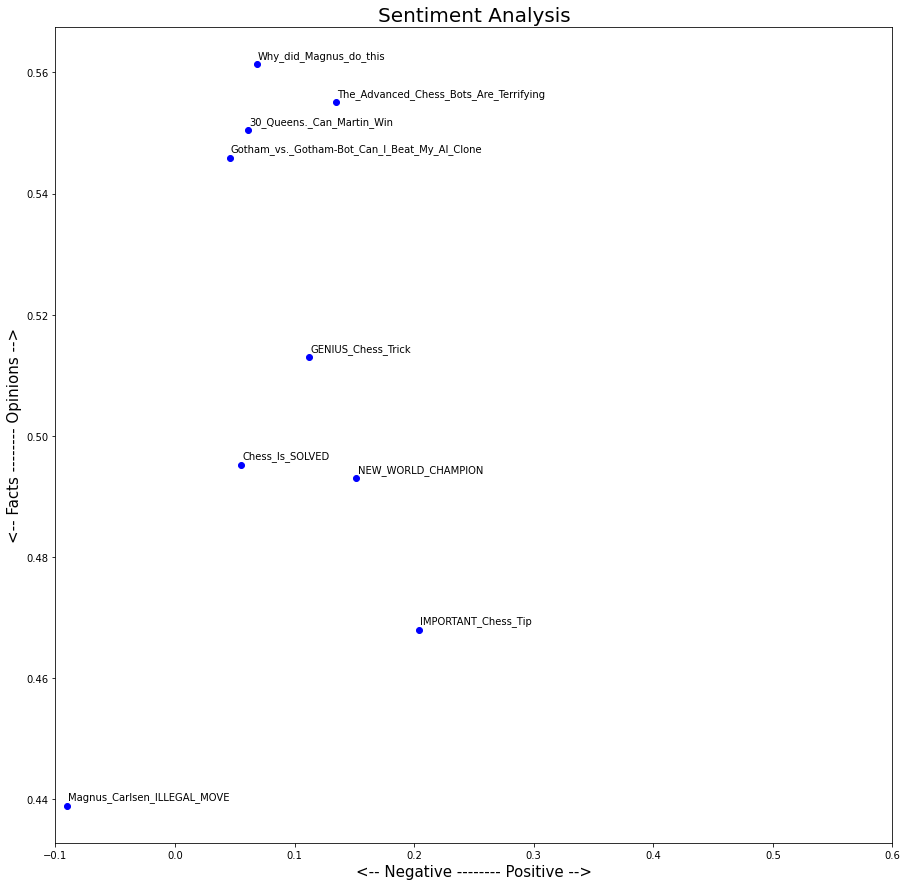

In [485]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

for index, episode in enumerate(data.index):
    x = data.polarity.loc[episode]
    y = data.subjectivity.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data["titles"][index], fontsize=10)
    plt.xlim(-.1 ,.60) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
import os
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the plot in the "results" folder
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_name = "sentiment_analysis.png"  # Specify the desired file name and extension
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

plt.show()